In [1]:
#Import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the datafile and convert into DataFrame
df=pd.read_csv('Auto_mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.shape

(398, 9)

In [4]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
#Separating the categorical columns and numerical columns

cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df>>>\n',cat_df,'\nnum_df>>>\n',num_df)

cat_df>>>
 ['horsepower', 'car name'] 
num_df>>>
 ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']


observation:
    the horse_power and car name features are categorical data and
    need to be transformed.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Finding: there is ? sign present in the place of missing values.
    therefore replace ? sign with NaN value.

In [8]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
#replace the ? with NaN
df=df.replace('?',np.nan)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
#changing the datatype of column horse power to impute missing values

df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')

In [14]:
print(df['horsepower'].dtypes)

float64


In [15]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

In [16]:
#now check any missing values

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

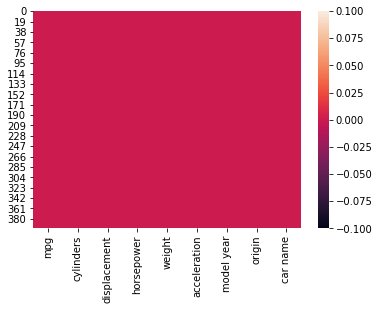

In [17]:
sns.heatmap(df.isnull())

## Statistical Summary

In [18]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
#checking correlation

df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


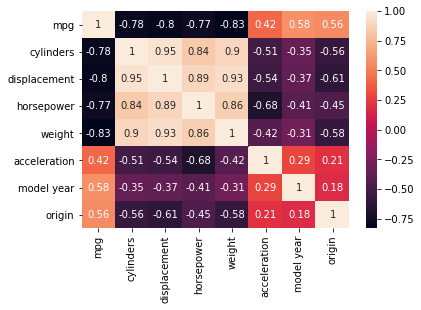

In [20]:
sns.heatmap(df.corr(),annot=True)

Observation:
    1.target feature mpg is highly negatively correlated with weight,horsepower,
    displacement,cylinders.
    2.acceleration is negatively correlated with horse power
    3.origin is negatively correlated with weight,displacement and cylinders.
    4.weight,cylinders,displacement and horse power are positively correlated with each 
    other

## Exploratory Data Analysis

In [21]:
for i in df.columns:
    print('>>>',i,'<<<',df[i].unique())

>>> mpg <<< [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]
>>> cylinders <<< [8 4 6 3 5]
>>> displacement <<< [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76. 

### Visualization of Data

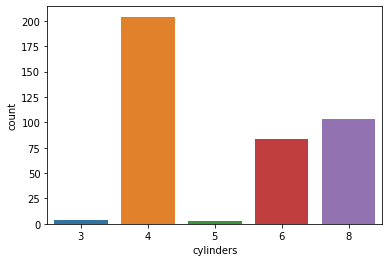

In [22]:
sns.countplot(df['cylinders'])

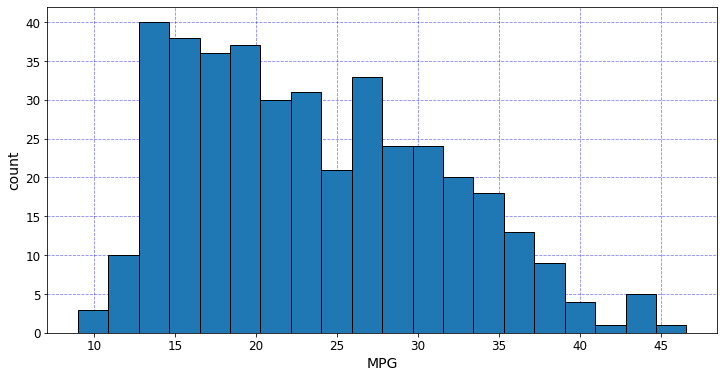

In [23]:
fig,axes=plt.subplots(1,1,figsize=(12,6))
plt.xlabel('MPG',fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('count',fontsize=14)
plt.yticks(fontsize=12)
plt.hist(df['mpg'],bins=20,edgecolor='black',linewidth=1.0)
axes.grid(color='b',alpha=0.5,linestyle='dashed',linewidth=0.8,visible=True)
axes.set_axisbelow(True)

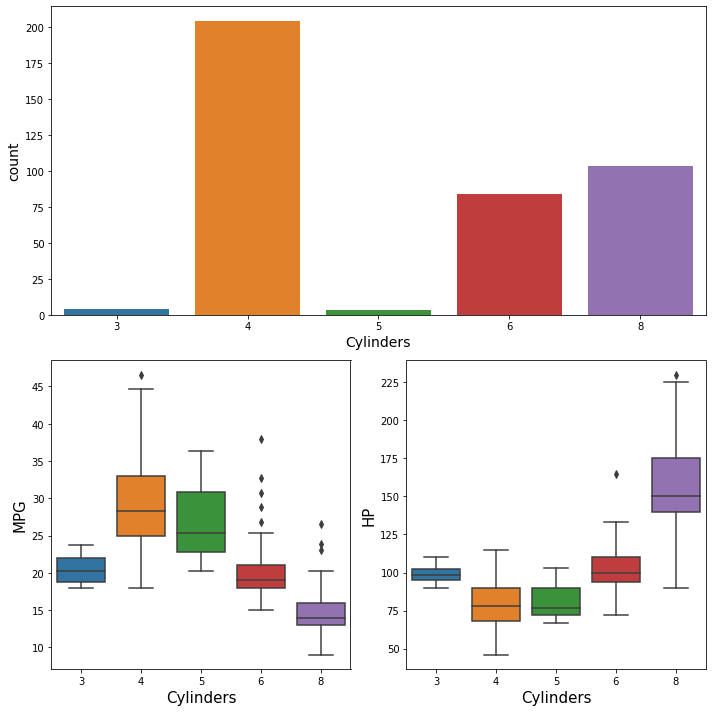

In [24]:
fig=plt.figure(figsize=(10,10))
ax1=plt.subplot2grid((2,2),(0,0),colspan=2)
ax2=plt.subplot2grid((2,2),(1,0))
ax3=plt.subplot2grid((2,2),(1,1))

sns.countplot(df['cylinders'],ax=ax1)
ax1.set_xlabel('Cylinders',fontsize=14)
ax1.set_ylabel('count',fontsize=14)

sns.boxplot(df['cylinders'],df['mpg'],ax=ax2)
ax2.set_xlabel('Cylinders',fontsize=15)
ax2.set_ylabel('MPG',fontsize=15)

sns.boxplot(df['cylinders'],df['horsepower'],ax=ax3)
ax3.set_xlabel('Cylinders',fontsize=15)
ax3.set_ylabel('HP',fontsize=15)

fig.tight_layout()


Observations:1. most of the cars have four cylinder engine.
    2.as number of cylinders in the engine increases MPG decreases
    3.the horsepower increases as the number of cylinders in engine
    decreases.

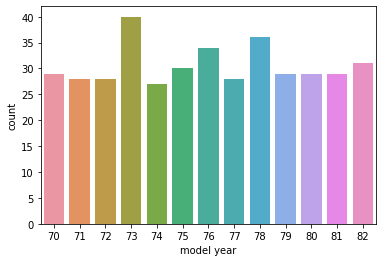

In [25]:
sns.countplot(df['model year'])

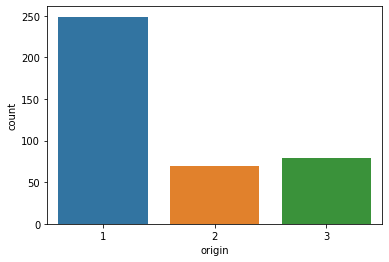

In [26]:
sns.countplot(df['origin'])

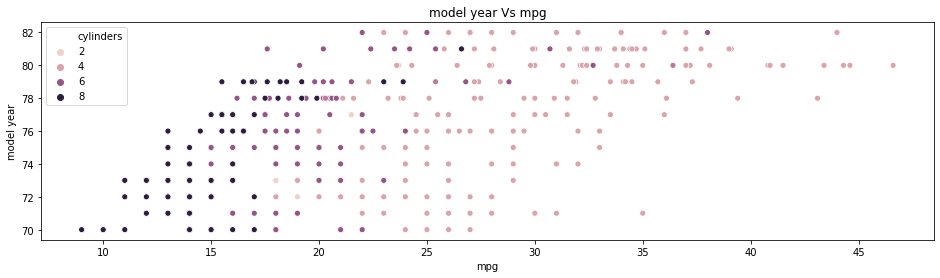

In [27]:
plt.figure(figsize=(16,4))
plt.title('model year Vs mpg')
sns.scatterplot(x='mpg',y='model year',data=df,hue='cylinders')

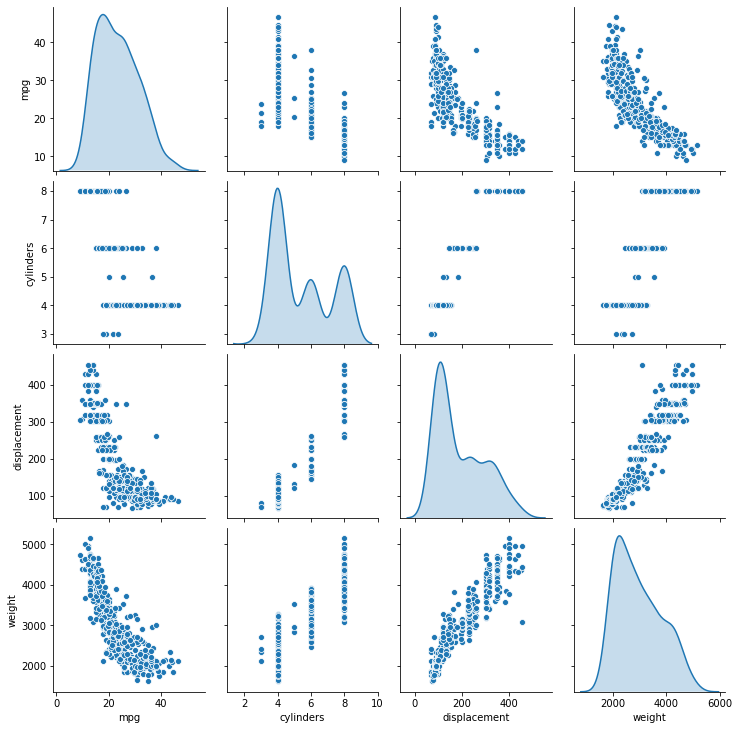

In [28]:
sns.pairplot(df[["mpg","cylinders","displacement","weight"]],diag_kind="kde")

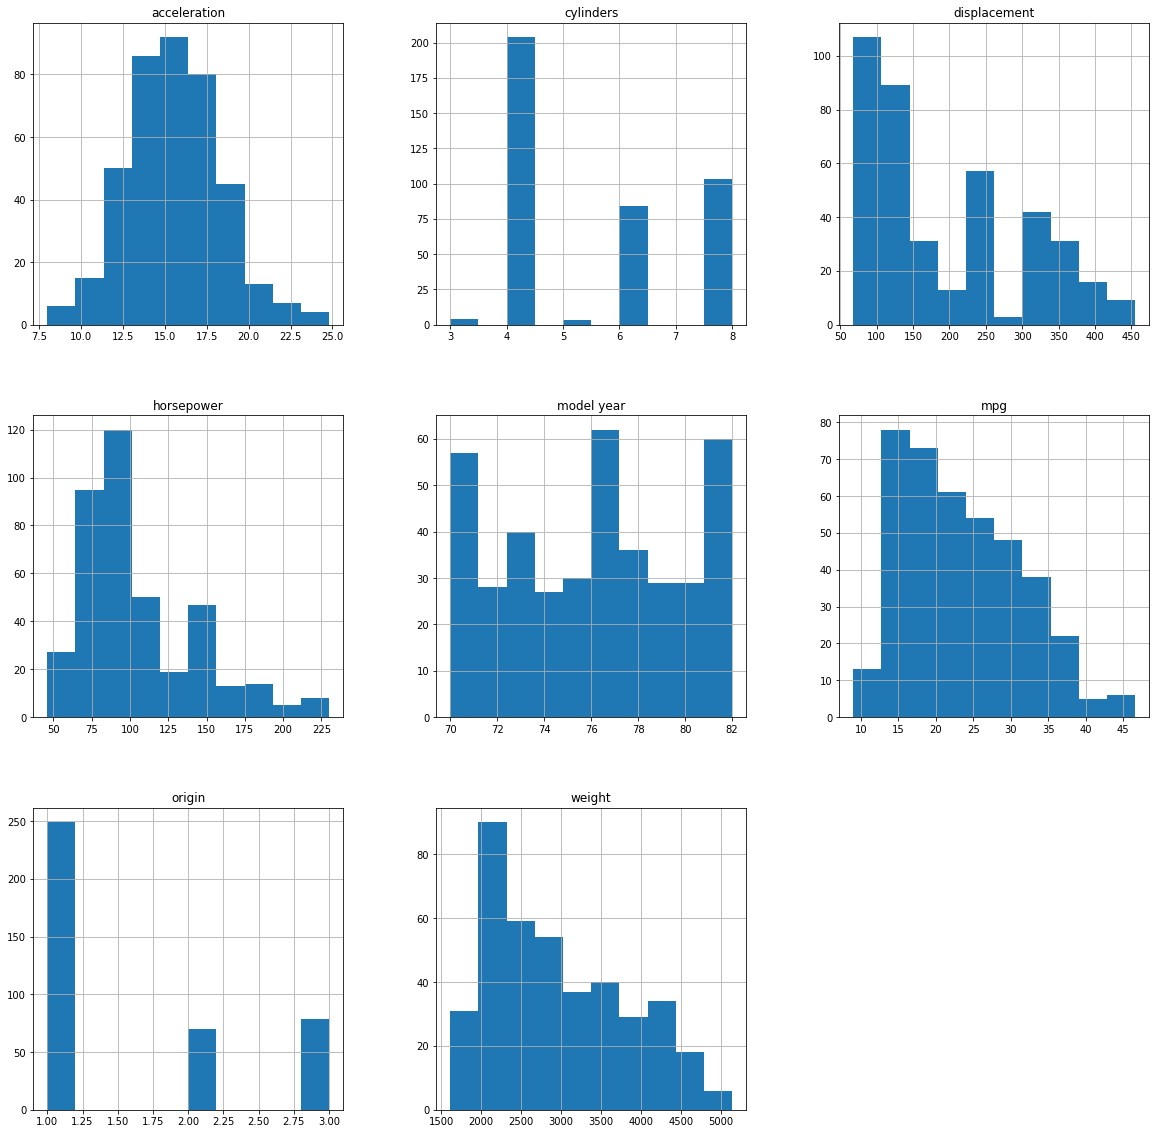

In [29]:
df.hist(figsize=(20,20))
plt.show()

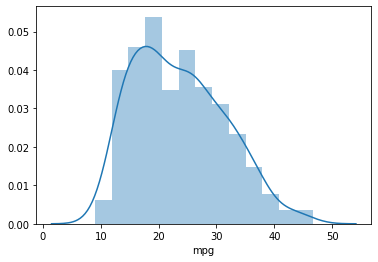

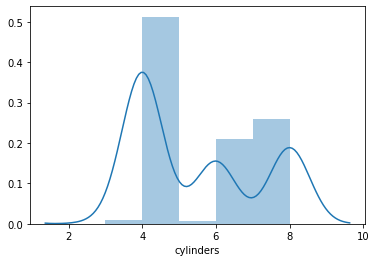

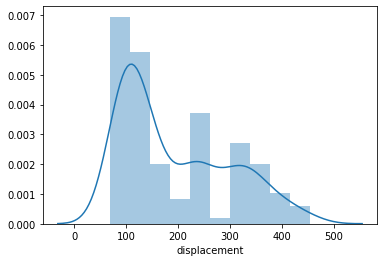

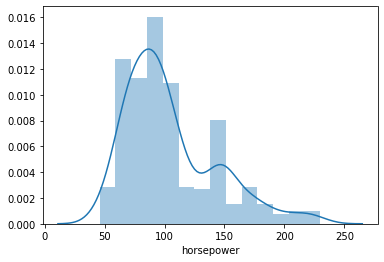

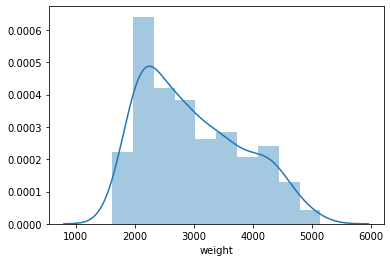

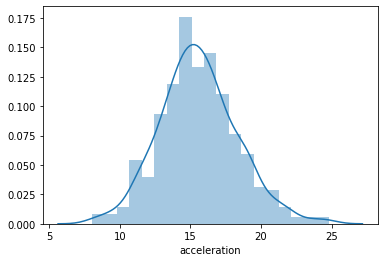

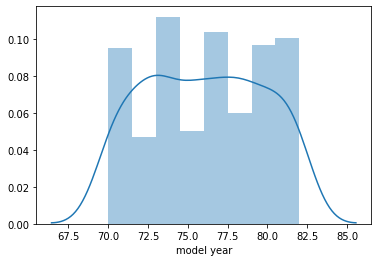

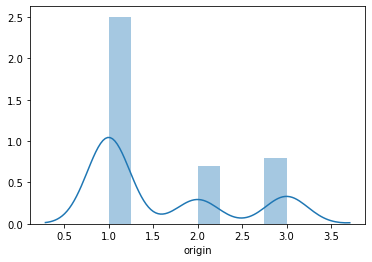

In [31]:
#Distribution plot for numeric columns

for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

## Checking Skewness

In [30]:
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.095552
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [32]:
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df.skew().loc[col]>0.55:
            df[col]=np.log1p(df[col])
            
        if df.skew().loc[col]<-0.55:
            df[col]=np.log1p(df[col])

In [33]:
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.228886
horsepower      0.372178
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.796540
dtype: float64

## Plotting Outliers

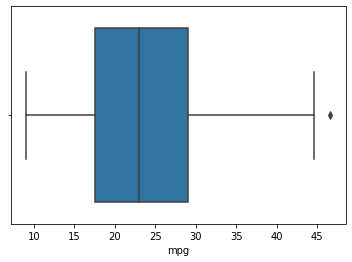

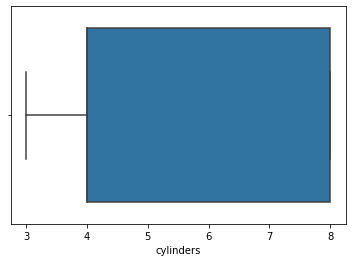

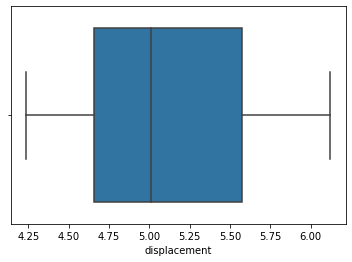

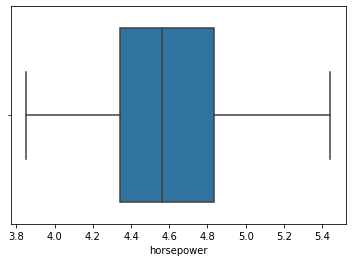

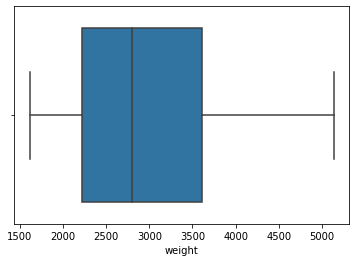

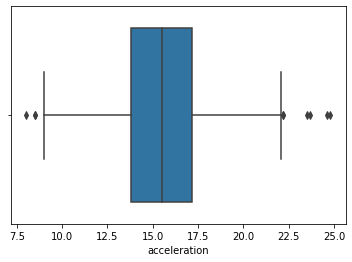

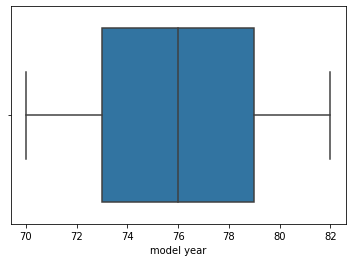

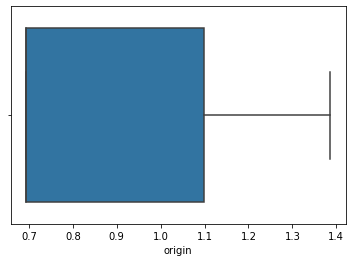

In [34]:
for i in df.describe().columns:
    sns.boxplot(df[i])
    plt.show()

In [35]:
# drop negatively correlated columns

df.drop(columns=['displacement','horsepower'],axis=1,inplace=True)

### Removing outliers

In [36]:
df.head()

,mpg,cylinders,weight,acceleration,model year,origin,car name
0,18.0,8,3504,12.0,70,0.693147,chevrolet chevelle malibu
1,15.0,8,3693,11.5,70,0.693147,buick skylark 320
2,18.0,8,3436,11.0,70,0.693147,plymouth satellite
3,16.0,8,3433,12.0,70,0.693147,amc rebel sst
4,17.0,8,3449,10.5,70,0.693147,ford torino


In [37]:
df.shape

(398, 7)

In [38]:
cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
print('cat_df>>>\n',cat_df,'\nnum_df>>>\n',num_df)

cat_df>>>
 ['car name'] 
num_df>>>
 ['mpg', 'cylinders', 'weight', 'acceleration', 'model year', 'origin']


In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[0.7064387 , 1.49819126, 0.63086987, 1.29549834, 1.62742629,
        0.73561335],
       [1.09075062, 1.49819126, 0.85433297, 1.47703779, 1.62742629,
        0.73561335],
       [0.7064387 , 1.49819126, 0.55047045, 1.65857724, 1.62742629,
        0.73561335],
       ...,
       [1.08701694, 0.85632057, 0.79858454, 1.4407299 , 1.62198339,
        0.73561335],
       [0.57460104, 0.85632057, 0.40841088, 1.10082237, 1.62198339,
        0.73561335],
       [0.95891297, 0.85632057, 0.29608816, 1.39128549, 1.62198339,
        0.73561335]])

In [40]:
threshold=3

print(np.where(z>3))

(array([299, 394], dtype=int64), array([3, 3], dtype=int64))


In [41]:
df=df[(z<3).all(axis=1)]

In [42]:
df.shape

(396, 7)

## Machine Learning Algorithm

In [43]:
#Splitting x and y variables

x=df.drop('mpg',axis=1)
y=df['mpg']

In [44]:
#using Label Encodr

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for column in x.columns:
    if x[column].dtype==np.number:
        continue
    x[column]=le.fit_transform(x[column])

In [45]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [47]:
#Model training

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score


In [49]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
 

In [51]:
print(x_train.shape,x_test.shape)

(316, 6) (80, 6)


In [52]:
print(y_train.shape,y_test.shape)

(316,) (80,)


In [53]:

from sklearn.metrics import mean_squared_error,r2_score
def models(model,x_train,x_test,y_train,y_test,score,rmse):
    model.fit(x_train,y_train)
    
    y_pred=model.predict(x_test)
    score.append(model.score(x_train,y_train))
    rmse.append(np.sqrt(mean_squared_error(y_test,y_pred)))
    
    print('Score:',model.score(x_train,y_train))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('r2_score:',r2_score(y_test,y_pred))

In [54]:
model_name,score,rmse=[],[],[]

In [55]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
mod='Linear Regression'
print('Model Report for',mod)
models(lreg,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model Report for Linear Regression
Score: 0.8537263189010633
RMSE: 3.1067298696792833
r2_score: 0.8155440460181926


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
#Ridge Regression

from sklearn.linear_model import Ridge
parameters={'alpha':[0.001,0.01,0.1,1]}
best=GridSearchCV(Ridge(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1}

In [58]:
rr=Ridge(alpha=1)
mod='Ridge Regression'
print('Model report for',mod)
models(rr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for Ridge Regression
Score: 0.8536996074425732
RMSE: 3.1047555296084743
r2_score: 0.8157784166123115


In [59]:
#Lasso Regression

from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1]}
best=GridSearchCV(Lasso(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 0.1}

In [60]:
lr=Lasso(alpha=1)
mod='Lasso Regression'
print('Model report for',mod)
models(lr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for Lasso Regression
Score: 0.8231381453030345
RMSE: 3.1213102773991954
r2_score: 0.8138086173626371


In [61]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(alpha=0.01)
mod='Elasticnet'
print('Model report for',mod)
models(en,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for Elasticnet
Score: 0.8536125323216655
RMSE: 3.1021722811087695
r2_score: 0.8160848447011104


In [62]:
# Support Vector Regression

from sklearn.svm import SVR
parameters={'kernel':['linear','poly','rbf']}
best=GridSearchCV(SVR(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'kernel': 'linear'}

In [63]:
svr=SVR(kernel='linear')
mod='Support Vector Regression'
print('Model report for',mod)
models(svr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for Support Vector Regression
Score: 0.8461309579308429
RMSE: 3.0458029805872604
r2_score: 0.8227079315397771


In [64]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
parameters={'max_depth':[8,10,12,15],'min_samples_leaf':[100,150]}
best=GridSearchCV(DecisionTreeRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 8, 'min_samples_leaf': 100}

In [65]:
dct=DecisionTreeRegressor(max_depth=8,min_samples_leaf=100)
mod='Decision Tree Regressor'
print('Model report for',mod)
models(dct,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for Decision Tree Regressor
Score: 0.5885894516193348
RMSE: 5.551745404957804
r2_score: 0.4109600157696184


In [66]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[200,300,400],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 6, 'n_estimators': 400}

In [67]:
rfr=RandomForestRegressor(n_estimators=200,max_depth=6)
mod='Random Forest Regression'
print('Model report is',mod)
models(rfr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report is Random Forest Regression
Score: 0.9592368923172876
RMSE: 2.700141423969822
r2_score: 0.8606654833300239


In [68]:
result=pd.DataFrame({'Model Name':model_name,'Score':score,'RMSE':rmse})
result

,Model Name,Score,RMSE
0,Linear Regression,0.853726,3.106730
1,Ridge Regression,0.853700,3.104756
2,Lasso Regression,0.823138,3.121310
3,Elasticnet,0.853613,3.102172
4,Support Vector Regression,0.846131,3.045803
5,Decision Tree Regressor,0.588589,5.551745
6,Random Forest Regression,0.959237,2.700141


Conclusion:
    Random Forest Regression gives the best accuracy score.

In [72]:
#saving the model

import joblib
from joblib import dump

joblib.dump(rfr,'RFR_Autompg.pkl')

['RFR_Autompg.pkl']

In [73]:
#Saving the result as csv file

df=pd.DataFrame(result)
df.to_csv('Auto_Mpg prediction.csv')
